# Machine learning and RNA PolII distribution of foci

## Mariamawit Ashenafi



## Introduction

RNA PolII: Enzyme implicated in gene expression 


# Wetlab methods

- Nuclei isolation and conservation
    - Extract nuclei from Arabidopsis leaves
    - Gel embedding of nuclei on slides
- Immunostaining - antibodies (add links)
    - RNA PolII NP :
    - RNA PolII Ser5P :
    - RNA PolII Ser2P :
    - DNA : stained in DAPI 
- Image acquisition _STED microscopy
    - Objectif: 63 Glycerol
    -  



# Is there a distribution pattern of the foci?

- In regards to DNA amount 
- In regards to chromocenters, nucleolus and nucleus center of mass(approximation to periphery)
- In regards to other RNA PolII foci

## Image processing 

(Plugins are developped in python to collect features from 3D images and export them in .csv files)

1. List plugins and their description  
2. 

### Features
(.csv files are then processed in R to manage the data better)

1. Features : 
2. Label : 

In [2]:
### python packages required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble, preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
### make plot appear inline
% matplotlib inline

C:\Users\Pheonix\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Getting the data

- The .csv files resulting from RNA PolII Data processing jupyter notebook are in 5 different folders.
- R was used for that module for specific packages that allow quick 3D distance calculation 
- However R has RAM issues when allocating to a vector or a matrix, so 5 folders are processed seperately and saved
- To read, and merge the heavy data and do machine learning, we use python

## Merge MLResult_Segmented

.... Read one table to check format

In [210]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/1/MLResult_Segmented.csv"
FilePath = "Z:\\Result0309\\s20_Wt\\1\\MLResult_Segmented.csv"
features = pd.read_csv(FilePath)

In [211]:
features.iloc[0:5,]

,SpotId,IntensityCh0,IntensityCh1,IntensityCh2,IntensityCh3,FociType,SegmentChannel,Nucleus_NumbSpot,Nucleus_MeanDist,Nucleus_MinDist,...,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N2Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,File
0,1,1.244,33.186,18.443,0.000,1,1.244,187.0,0.635023,0.094970,...,2.079162,3.741314,10.955889,28.138884,4.708392,2.039849,4.499496,13.739613,25.118992,s20_wt_aa_series005.ims
1,2,1.208,30.782,17.106,0.000,1,1.208,50.0,0.920218,0.850991,...,2.079162,3.741314,10.955889,28.138884,4.708392,2.039849,4.499496,13.739613,25.118992,s20_wt_aa_series005.ims
2,3,2.274,47.134,26.194,3.195,1,2.274,151.0,0.683603,0.063165,...,2.079162,3.741314,10.955889,28.138884,4.708392,2.039849,4.499496,13.739613,25.118992,s20_wt_aa_series005.ims
3,4,1.208,47.134,26.194,0.000,1,1.208,176.0,0.701352,0.240157,...,2.079162,3.741314,10.955889,28.138884,4.708392,2.039849,4.499496,13.739613,25.118992,s20_wt_aa_series005.ims
4,5,2.452,33.186,18.443,0.000,1,2.452,156.0,0.679414,0.098828,...,2.079162,3.741314,10.955889,28.138884,4.708392,2.039849,4.499496,13.739613,25.118992,s20_wt_aa_series005.ims


... read results from all 5 folders and merge

In [2]:
#del features
Result=pd.DataFrame()
isLinux=False
FileSeperator="/" if isLinux else "\\"
#MotherFolder= "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt"#for linux
MotherFolder= "Z:\\Result0309\\s20_Wt"#for windows
for p in range(1,5):
    FilePath = FileSeperator.join(map(str, [MotherFolder, str(p), "MLResult_Segmented.csv"])) 
    features = pd.read_csv(FilePath)
    Result=Result.append(features)
del features

In [8]:
print(Result.shape)
print (Result.columns)

(542412, 51)
Index([u'SpotId', u'FociType', u'File', u'Nucleus_MeanDist',
       u'Nucleus_MinDist', u'Nucleus_MaxDist', u'Chromocenters_MeanDist',
       u'Chromocenters_MinDist', u'Chromocenters_MaxDist',
       u'Nucleolus_MeanDist', u'Nucleolus_MinDist', u'Nucleolus_MaxDist',
       u'Sp1MeanDist', u'Sp1MinDist', u'Sp1MaxDist', u'Sp2MeanDist',
       u'Sp2MinDist', u'Sp2MaxDist', u'Sp3MeanDist', u'Sp3MinDist',
       u'Sp3MaxDist', u'N1Volume', u'N1IntensityCh0', u'N1IntensityCh1',
       u'N1IntensityCh2', u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0',
       u'N2IntensityCh1', u'N2IntensityCh2', u'N2IntensityCh3',
       u'IntensityCh0', u'IntensityCh1', u'IntensityCh2', u'IntensityCh3',
       u'SegmentChannel', u'Nucleus_NumbSpot', u'Chromocenters_NumbSpot',
       u'Nucleolus_NumbSpot', u'Sp1NumbSpot', u'Sp2NumbSpot', u'Sp3NumbSpot',
       u'NucleusCMDist', u'NucleolusCMDist', u'MeanCCDist', u'ClosestCCCMDist',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'I

... save intermediate df

In [4]:
FilePath = FileSeperator.join(map(str, [MotherFolder, "MLResultObs.csv"])) 
Result.to_csv(FilePath, index=False)

## Merge MLResult_Simulated

In [5]:
#del features
ResultSim=pd.DataFrame()
isLinux=False
FileSeperator="/" if isLinux else "\\"
#MotherFolder= "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt"#for linux
MotherFolder= "Z:\\Result0309\\s20_Wt"#for windows
for p in range(1,5):
    FilePath = FileSeperator.join(map(str, [MotherFolder, str(p), "MLResult_Simulated.csv"])) 
    features = pd.read_csv(FilePath)
    ResultSim=ResultSim.append(features)
del features

... save intermediate df

In [7]:
print(ResultSim.shape)

(1020000, 51)


In [217]:
FilePath = FileSeperator.join(map(str, [MotherFolder, "MLResultSim.csv"])) 
ResultSim.to_csv(FilePath, index=False)

## Merge observed and simulated data

In [6]:
#or read files
FilePath = "Z:/Result0309/s20_Wt/MLResultObs.csv"# for windows
Result = pd.read_csv(FilePath)
FilePath = "Z:/Result0309/s20_Wt/MLResultSim.csv"# for windows
ResultSim = pd.read_csv(FilePath)

KeyboardInterrupt: 

In [9]:
ResultFinal=Result.append(ResultSim)

In [10]:
print(ResultFinal.shape)

(1562412, 51)


In [11]:
del Result,ResultSim

In [12]:
ResultFinal.to_csv("Z:/Result0309/s20_Wt/MLResultR.csv", index=False)

In [13]:
Result=ResultFinal.copy()
del ResultFinal

... or read saved file

In [26]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultR.csv"# for linux
FilePath = "Z:/Result0309/s20_Wt/MLResultR.csv"# for windows
Result = pd.read_csv(FilePath)

## Feature normalization

1. Distances, intensities and CC volumes have already been scaled per image
2. Nucleus and and nucleolus features though have not been scaled yet 
3. Plot data and see if Log transforming the features is necessary

In [27]:
#del features
Result.columns

Index([u'SpotId', u'FociType', u'File', u'Nucleus_MeanDist',
       u'Nucleus_MinDist', u'Nucleus_MaxDist', u'Chromocenters_MeanDist',
       u'Chromocenters_MinDist', u'Chromocenters_MaxDist',
       u'Nucleolus_MeanDist', u'Nucleolus_MinDist', u'Nucleolus_MaxDist',
       u'Sp1MeanDist', u'Sp1MinDist', u'Sp1MaxDist', u'Sp2MeanDist',
       u'Sp2MinDist', u'Sp2MaxDist', u'Sp3MeanDist', u'Sp3MinDist',
       u'Sp3MaxDist', u'N1Volume', u'N1IntensityCh0', u'N1IntensityCh1',
       u'N1IntensityCh2', u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0',
       u'N2IntensityCh1', u'N2IntensityCh2', u'N2IntensityCh3',
       u'IntensityCh0', u'IntensityCh1', u'IntensityCh2', u'IntensityCh3',
       u'SegmentChannel', u'Nucleus_NumbSpot', u'Chromocenters_NumbSpot',
       u'Nucleolus_NumbSpot', u'Sp1NumbSpot', u'Sp2NumbSpot', u'Sp3NumbSpot',
       u'NucleusCMDist', u'NucleolusCMDist', u'MeanCCDist', u'ClosestCCCMDist',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC

## Visualise features
0. Drop SpotId = don't need that column
1. For visualisation : drop Categorical columns : FociType, File

In [28]:
#remove SpotId column
Result=Result.drop("SpotId", axis=1)

Text(0.5,1,u'Raw numerical data')

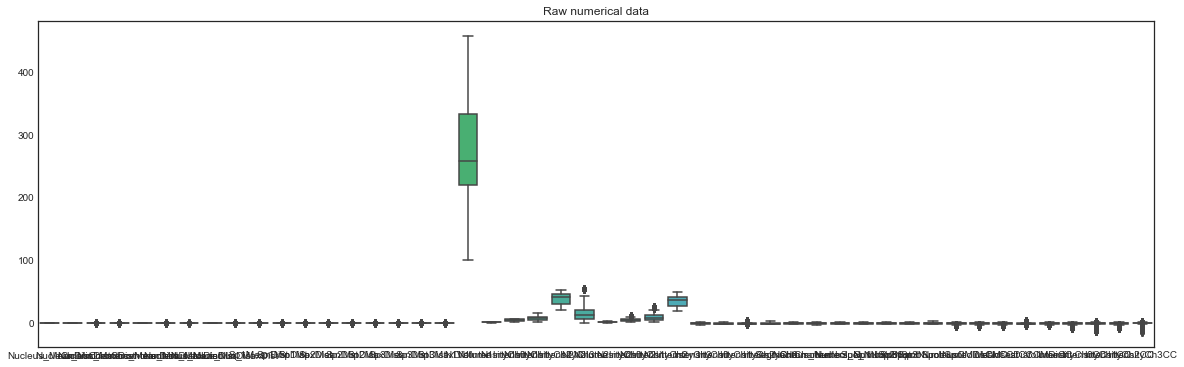

In [6]:
#Boxplot feature before removing outliers
test=Result.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("Raw numerical data")

#### Scale data data
- Nucleus, nucleolus features

In [29]:
ColumnsToScale = [u'N1IntensityCh0',
       u'N1IntensityCh1', u'N1IntensityCh2', u'N1IntensityCh3', u'N1Volume',
       u'N2IntensityCh0', u'N2IntensityCh1', u'N2IntensityCh2',
       u'N2IntensityCh3', u'N2Volume']
newdf = pd.DataFrame(preprocessing.scale(Result[ColumnsToScale]), index=Result.index, columns=ColumnsToScale)
newdf1 = Result.drop(ColumnsToScale, 1)
newdf = pd.concat([newdf1, newdf], axis=1)
del newdf1
newdf.head()

,FociType,File,Nucleus_MeanDist,Nucleus_MinDist,Nucleus_MaxDist,Chromocenters_MeanDist,Chromocenters_MinDist,Chromocenters_MaxDist,Nucleolus_MeanDist,Nucleolus_MinDist,...,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume
0,1,s20_wt_aa_series005.ims,0.635023,0.094970,0.998304,0.773548,0.534395,0.996980,NaN,NaN,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
1,1,s20_wt_aa_series005.ims,0.920218,0.850991,0.989156,0.660642,0.124662,0.999427,NaN,NaN,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
2,1,s20_wt_aa_series005.ims,0.683603,0.063165,0.995404,NaN,NaN,NaN,NaN,NaN,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
3,1,s20_wt_aa_series005.ims,0.701352,0.240157,0.999652,0.959830,0.921186,0.997536,NaN,NaN,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
4,1,s20_wt_aa_series005.ims,0.679414,0.098828,0.999652,NaN,NaN,NaN,NaN,NaN,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794


#### Manage missing data

In [8]:
NumberOfSpots=["Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot", "Nucleolus_NumbSpot", "Nucleus_NumbSpot", "Chromocenters_NumbSpot"]
DistanceFeatures=["Sp1MeanDist", "Sp1MinDist", "Sp1MaxDist", 
          "Sp2MeanDist", "Sp2MinDist", "Sp2MaxDist", 
          "Sp3MeanDist", "Sp3MinDist", "Sp3MaxDist", 
          "Nucleolus_MeanDist", "Nucleolus_MinDist", "Nucleolus_MaxDist",
          "Nucleus_MeanDist", "Nucleus_MinDist", "Nucleus_MaxDist",
          "Chromocenters_MeanDist", "Chromocenters_MinDist", "Chromocenters_MaxDist"]
FactorColumns=["FociType"]
for c in FactorColumns:
    newdf[c] = pd.factorize(newdf[c])[0]
for c in NumberOfSpots:
    newdf[c] = newdf[c].fillna(0)
for c in DistanceFeatures:
    newdf[c] = newdf[c].fillna(10) 
#Replace other NaN by 0
newdf=newdf.fillna(0)    
newdf.head()

,FociType,File,Nucleus_MeanDist,Nucleus_MinDist,Nucleus_MaxDist,Chromocenters_MeanDist,Chromocenters_MinDist,Chromocenters_MaxDist,Nucleolus_MeanDist,Nucleolus_MinDist,...,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume
0,0,s20_wt_aa_series005.ims,0.635023,0.094970,0.998304,0.773548,0.534395,0.996980,10.0,10.0,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
1,0,s20_wt_aa_series005.ims,0.920218,0.850991,0.989156,0.660642,0.124662,0.999427,10.0,10.0,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
2,0,s20_wt_aa_series005.ims,0.683603,0.063165,0.995404,10.000000,10.000000,10.000000,10.0,10.0,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
3,0,s20_wt_aa_series005.ims,0.701352,0.240157,0.999652,0.959830,0.921186,0.997536,10.0,10.0,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
4,0,s20_wt_aa_series005.ims,0.679414,0.098828,0.999652,10.000000,10.000000,10.000000,10.0,10.0,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794


Text(0.5,1,u'After scaling data')

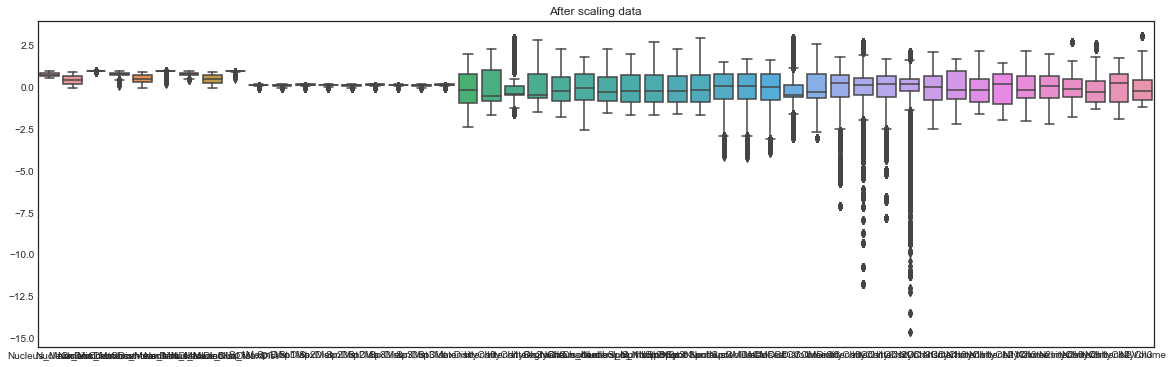

In [30]:
#Boxplot feature before removing outliers
test=newdf.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("After scaling data")

## Add ploidy index

In [31]:
FilePath = "Z:/Result0309/s20_Wt/XTNucleiPloidy_Result/XTNucleiPloidy_Result.csv"# for windows
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/XTNucleiPloidy_Result/XTNucleiPloidy_Result.csv"# for linux
Ploidy = pd.read_csv(FilePath)
Ploidy.head()

,ClusterId,FileName,MeanIntensity,SumIntensity,Volume
0,P0,s20_wt_aa_series005.ims,27.313093,262055504.0,306.573273
1,P0,s20_wt_ab_series006.ims,23.910700,164479776.0,219.863632
2,P0,s20_wt_ac_series007.ims,31.358595,91467160.0,93.077141
3,P0,s20_wt_ad_series008.ims,42.793816,230455280.0,172.106857
4,P0,s20_wt_ae_series009.ims,40.791016,316271360.0,247.735687


In [32]:
Ploidy=Ploidy[["ClusterId", "FileName"]]
newdf = newdf.join(Ploidy.set_index('FileName'), on='File')
newdf.head()

,FociType,File,Nucleus_MeanDist,Nucleus_MinDist,Nucleus_MaxDist,Chromocenters_MeanDist,Chromocenters_MinDist,Chromocenters_MaxDist,Nucleolus_MeanDist,Nucleolus_MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,1,s20_wt_aa_series005.ims,0.635023,0.094970,0.998304,0.773548,0.534395,0.996980,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
1,1,s20_wt_aa_series005.ims,0.920218,0.850991,0.989156,0.660642,0.124662,0.999427,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
2,1,s20_wt_aa_series005.ims,0.683603,0.063165,0.995404,NaN,NaN,NaN,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
3,1,s20_wt_aa_series005.ims,0.701352,0.240157,0.999652,0.959830,0.921186,0.997536,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
4,1,s20_wt_aa_series005.ims,0.679414,0.098828,0.999652,NaN,NaN,NaN,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0


In [33]:
FactorColumns=["ClusterId", "File"]   
for c in FactorColumns:
    newdf[c] = pd.factorize(newdf[c])[0]

In [34]:
newdf.head()

,FociType,File,Nucleus_MeanDist,Nucleus_MinDist,Nucleus_MaxDist,Chromocenters_MeanDist,Chromocenters_MinDist,Chromocenters_MaxDist,Nucleolus_MeanDist,Nucleolus_MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,1,0,0.635023,0.094970,0.998304,0.773548,0.534395,0.996980,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
1,1,0,0.920218,0.850991,0.989156,0.660642,0.124662,0.999427,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
2,1,0,0.683603,0.063165,0.995404,NaN,NaN,NaN,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
3,1,0,0.701352,0.240157,0.999652,0.959830,0.921186,0.997536,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
4,1,0,0.679414,0.098828,0.999652,NaN,NaN,NaN,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0


In [35]:
del Ploidy

### Fine tune classifier parameters
1. Fine tune number of trees in terms of accuracy 
2. Set scoring ="f1_weighted", because I have different number of foci for each foci type, this can explain why I get higher accuracy for Ser5P compared to the others  = I need to compensate for unbalanced data. I want to see which number to tree does that best.
3. Train classifiers on portion of segmented spots and test it on left out portion on segmented and on simulated data
4. Split train and test set preserving foci proportion
5. Segmentchannel = intensity in segmented channel, however in data processing pipeline scaled the numeric data after I created this column. It could be that there is signal difference between antibodies. So create a column with same information after scaling

Weighted: Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 


...Transform SegmentChannel column from df

In [15]:
newdf["SegmentChannel"]=0 #for simulated data
newdf.loc[newdf["FociType"]==0,"SegmentChannel"] =newdf.loc[newdf["FociType"]==0,'IntensityCh1'] # NP intensity
newdf.loc[newdf["FociType"]==1,"SegmentChannel"] =newdf.loc[newdf["FociType"]==1,'IntensityCh2'] # Ser2P intensity
newdf.loc[newdf["FociType"]==2,"SegmentChannel"] =newdf.loc[newdf["FociType"]==2,'IntensityCh3'] # Ser5P intensity

...Seperate segmented and simulated data

In [16]:
SimulatedData = newdf.loc[newdf["FociType"]>2,]
SegmentedData = newdf.loc[newdf["FociType"]<3,]
print(SimulatedData.shape)
print(SegmentedData.shape)

(1020000, 51)
(542412, 51)


...Prepare train set and data set

In [17]:
labels  = SegmentedData["FociType"].values
TrainSet,TestSet = train_test_split(SegmentedData,stratify=labels, test_size=0.3, random_state=20012017)
features= TrainSet.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values
labels  = TrainSet["FociType"].values
print(TrainSet.shape)
print(TestSet.shape)

(379688, 51)
(162724, 51)


In [120]:
F1Score=[]
Accuracy=[]
for nbreTree in range(10,140,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetF1 = cross_validation.cross_val_score(rf, features, labels, cv=10, scoring="f1_weighted")
    F1Score.append(GetF1)
    print(nbreTree)

10
20
30
40
50
60
70
80
90
100
110
120
130


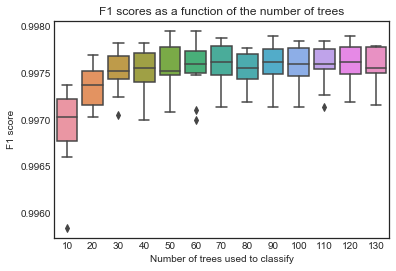

In [121]:
sns.boxplot(range(10,140,10), F1Score)
plt.xlabel("Number of trees used to classify")
plt.ylabel("F1 score")
plt.title("F1 scores as a function of the number of trees")
plt.show()

...F1 score, doesn't seem to improve after 30 trees ...40 to be safe 

In [65]:
Accuracy=[]
for nbreTree in range(40,100,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetScore = cross_validation.cross_val_score(rf, features, labels, cv=10)
    Accuracy.append(GetScore)
    print(nbreTree)

40
50
60
70
80
90


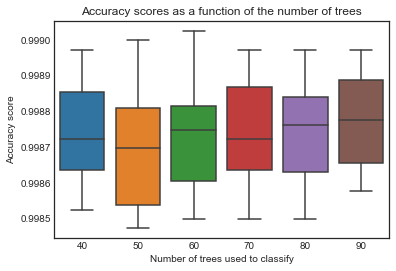

In [66]:
sns.boxplot(range(40,100,10), Accuracy)
plt.xlabel("Number of trees used to classify")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores as a function of the number of trees")
plt.show()

...Accuracy, doesn't seem to improve after 40 either. 

***Number of tree = 40, Accuracy =0.99***
### Use new parameters to create classifiers

In [56]:
rf= ensemble.RandomForestClassifier(n_estimators=40)
rf.fit(features,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict test data with new classifer

In [57]:
PredFoci=rf.predict(TestSet[Lab])

In [58]:
FociNames=["NP", "Ser2P", "Ser5P"]
predFociRealLab = [FociNames[y] for y in PredFoci]
ObserRealLab=[FociNames[y] for y in TestSet["FociType"].values]
print(predFociRealLab [0:6])
print(ObserRealLab [0:6])

['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']


In [59]:
pd.crosstab(np.array(ObserRealLab), np.array(predFociRealLab), 
            rownames=['Actual Foci'], colnames=['Predicted Foci'], 
            normalize='index')

Predicted Foci,NP,Ser2P,Ser5P
Actual Foci,,,
NP,0.998012,0.000197,0.001792
Ser2P,0.012553,0.981982,0.005465
Ser5P,0.000729,0.002682,0.996588


In [60]:
print("Accuracy score:")
print(metrics.accuracy_score(TestSet["FociType"].values, PredFoci))

Accuracy score:
0.993879206509


### Add simulated data in test data 
***How are the simulated spots classified?***

In [61]:
TestWSim=TestSet.append(SimulatedData)
PredSim=rf.predict(TestWSim[Lab])

In [62]:
FociNames=["NP", "Ser2P", "Ser5P", "Sim"]
predSimLab = [FociNames[y] for y in PredSim]
RealLabel = TestSet["FociType"].values.tolist()+np.repeat(3, len(SimulatedData)).tolist()
ObserSimLab=[FociNames[y] for y in np.array(RealLabel)]
print(predSimLab [0:6])
print(ObserSimLab [0:6])
print("Accuracy score:")
print(metrics.accuracy_score(TestWSim["FociType"].values, PredSim))

['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
Accuracy score:
0.136741961776


In [63]:
pd.crosstab(np.array(ObserSimLab), np.array(predSimLab), 
            rownames=['Actual Foci'], colnames=['Predicted Foci'], 
            normalize='index')

Predicted Foci,NP,Ser2P,Ser5P
Actual Foci,,,
NP,0.998012,0.000197,0.001792
Ser2P,0.012553,0.981982,0.005465
Ser5P,0.000729,0.002682,0.996588
Sim,0.030401,0.443295,0.526304


### Understand classifer
#### Important features

In [47]:
Lab

Index([      u'Nucleus_MeanDist',        u'Nucleus_MinDist',
              u'Nucleus_MaxDist', u'Chromocenters_MeanDist',
        u'Chromocenters_MinDist',  u'Chromocenters_MaxDist',
           u'Nucleolus_MeanDist',      u'Nucleolus_MinDist',
            u'Nucleolus_MaxDist',            u'Sp1MeanDist',
                   u'Sp1MinDist',             u'Sp1MaxDist',
                  u'Sp2MeanDist',             u'Sp2MinDist',
                   u'Sp2MaxDist',            u'Sp3MeanDist',
                   u'Sp3MinDist',             u'Sp3MaxDist',
                 u'IntensityCh0',         u'SegmentChannel',
             u'Nucleus_NumbSpot', u'Chromocenters_NumbSpot',
           u'Nucleolus_NumbSpot',            u'Sp1NumbSpot',
                  u'Sp2NumbSpot',            u'Sp3NumbSpot',
                u'NucleusCMDist',        u'NucleolusCMDist',
                   u'MeanCCDist',        u'ClosestCCCMDist',
                     u'VolumeCC',         u'IntensityCh0CC',
               u'Intensi

In [64]:
impFeatures=rf.feature_importances_

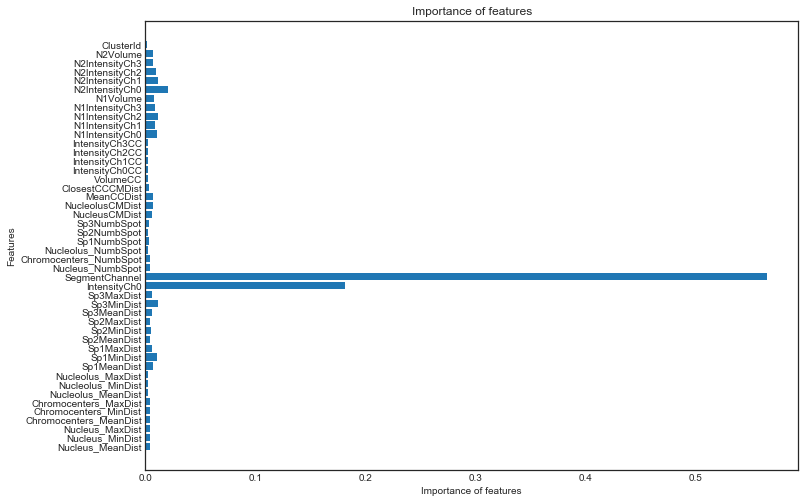

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features")
plt.show()

**Important features are: **
* Segmented channel intensity (1)
* DAPI intensitiy (2)
* Distance to Ser5P and NP spots (3)
* Intensities of all PolII inside the nucleus (4)
* DAPI and PolII intensities inside the nucleolus surface (5)
* Nucleus and nucleolus volume (6)
* Position in regards to all chromocenters and the nucleolus CM (7)

#### Analyse (1,2,3)

In [66]:
SelFeat = ["SegmentChannel", "IntensityCh0", "Sp3MinDist", "Sp1MinDist", "NucleusCMDist", "NucleolusCMDist", "MeanCCDist"]
Ylab = ["Immunostaining signal intensity", 
        "DAPI intensity", 
        "Distance to closest Ser5P foci",
        "Distance to closest NP foci"
       ]

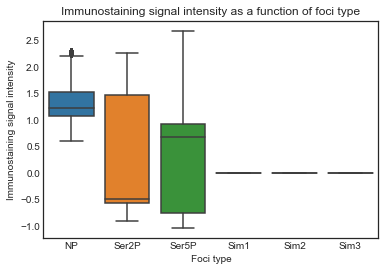

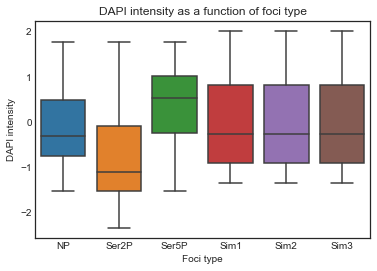

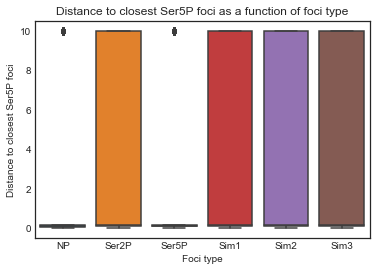

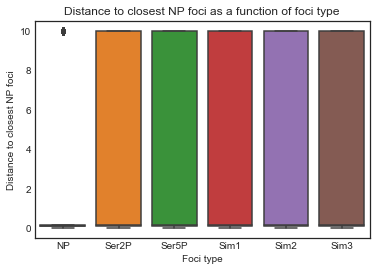

In [67]:
for feat, lab in zip(SelFeat, Ylab):
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4)
    sns.boxplot(newdf["FociType"], newdf[feat])
    plt.xlabel("Foci type")
    ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
    plt.ylabel(lab)
    plt.title(lab+" as a function of foci type")
    plt.show()

### Conclusion PolII distribution is not random - Part I
1. The intensities in NP spots are homogeneous compared to Ser2P and Ser5P, and NP is significantly higher in NP spots.
2. Ser2P is positioned at low DAPI intensity than average. Ser5P is positioned at high DAPI intensity than average. 
3. There is a higher number of Ser5P and NP spots positioned away from Ser5P than random or Ser2P spots
4. There is a higher number of NP spots positioned away from NPs than random, Ser5P, and Ser2P spots -> either lower number of NP than other spot types or clustering of NPs (there is also a cluster distance=0)



#### Check number of spots for each isoform

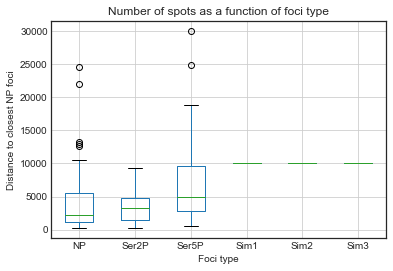

In [68]:
#Count number of spots for each foci
tab = newdf.groupby(['File', 'FociType']).size()
tab=tab.unstack()
tab=pd.DataFrame(tab)
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
tab.boxplot()
plt.xlabel("Foci type")
ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
plt.ylabel(lab)
plt.title("Number of spots as a function of foci type")
plt.show()


#### Check intensities in all PolII channels to confirm clustering 

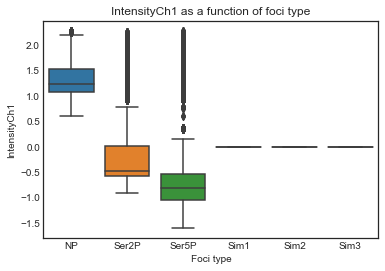

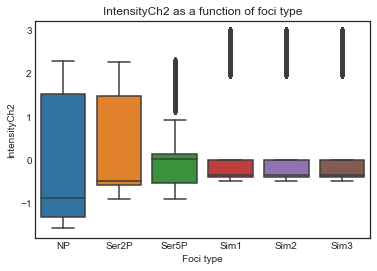

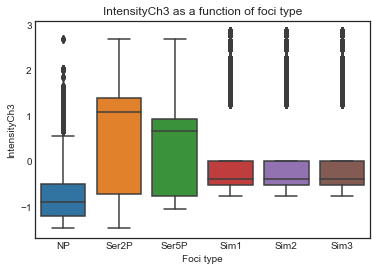

In [70]:
Ylab=["IntensityCh"+str(x) for x in range(1,4)]
for feat, lab in zip(range(1,4), Ylab):
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4)
    sns.boxplot(newdf["FociType"], newdf["IntensityCh"+str(feat)])
    plt.xlabel("Foci type")
    ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
    plt.ylabel(lab)
    plt.title(lab+" as a function of foci type")
    plt.show()

### Conclusion PolII distribution is not random - Part II
6. Fewer NP than other isoforms (random spots)
7. NP is isolated from Ser2P and Ser5P more so than in random spots (figure 1)
7. High colocalisation of Ser2P colocolise with other isoforms (figure 2)
7. Few Ser5P in proximity of NP, more than in random spots (figure 3)

**Important features are: **
* Segmented channel intensity (1)
* DAPI intensitiy (2)
* Distance to Ser5P and NP spots (3)
* Intensities of all PolII inside the nucleus (4)
* DAPI and PolII intensities inside the nucleolus surface (5)
* Nucleus and nucleolus volume (6)
* Position in regards to all chromocenters and the nucleolus CM (7)

#### Analyse (4,5,6,7)

These features aren't spot specific for one image. So it is likely that they affect how the most dominant features (i.e. SegmentChannel, IntensityCh0) relates to foci type
1. Transform features (4,5,6,7) into factorial features
2. Replot the same boxplots as before for different classes

In [60]:
Ylab=["IntensityCh"+str(x) for x in range(1,4)]
SelFeat = ["SegmentChannel", "IntensityCh0", "Sp3MinDist", "Sp1MinDist"]
SelFeat=SelFeat+Ylab
SelFeat

['SegmentChannel',
 'IntensityCh0',
 'Sp3MinDist',
 'Sp1MinDist',
 'IntensityCh1',
 'IntensityCh2',
 'IntensityCh3']

In [61]:
AnalysedFeat=["NucleolusCMDist", "MeanCCDist", 
              "N1IntensityCh1", "N1IntensityCh2" ,"N1IntensityCh3",
             "N2IntensityCh0", "N2IntensityCh1", "N2IntensityCh2" ,"N2IntensityCh3", 
             "N1Volume", "N2Volume"]


Text(0.5,1,u'Range of analysed features')

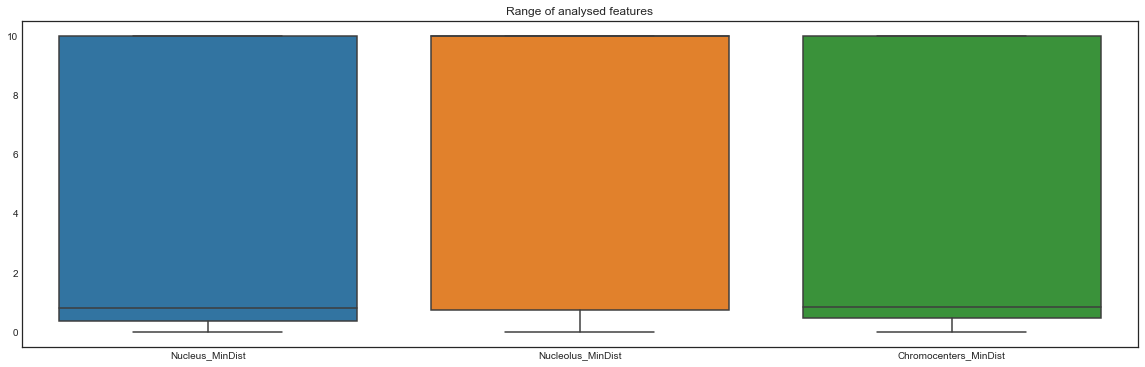

In [64]:
tab=newdf[AnalysedFeat]
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=tab)
plt.title("Range of analysed features")

In [85]:
?sns.boxplot()

In [62]:
tab=pd.DataFrame(newdf[SelFeat+["FociType"]])
for col in AnalysedFeat:
    tab[col]= pd.cut( newdf[col], range(-3,3)) 
df = pd.melt(tab, id_vars=['FociType']+AnalysedFeat)

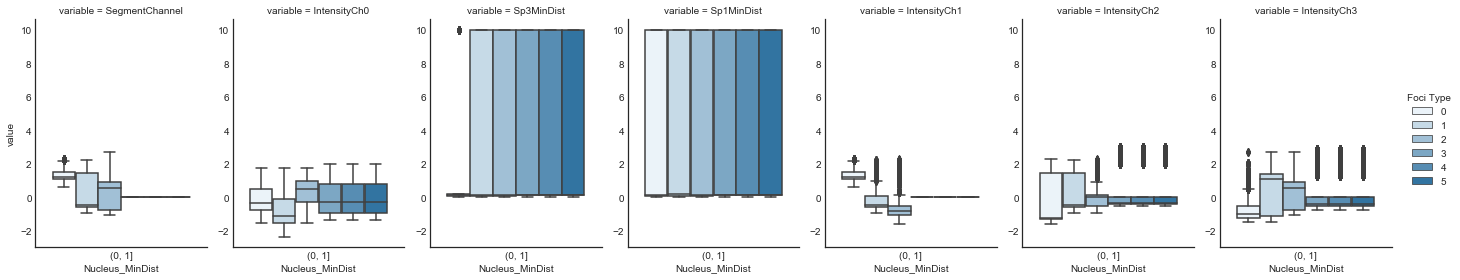

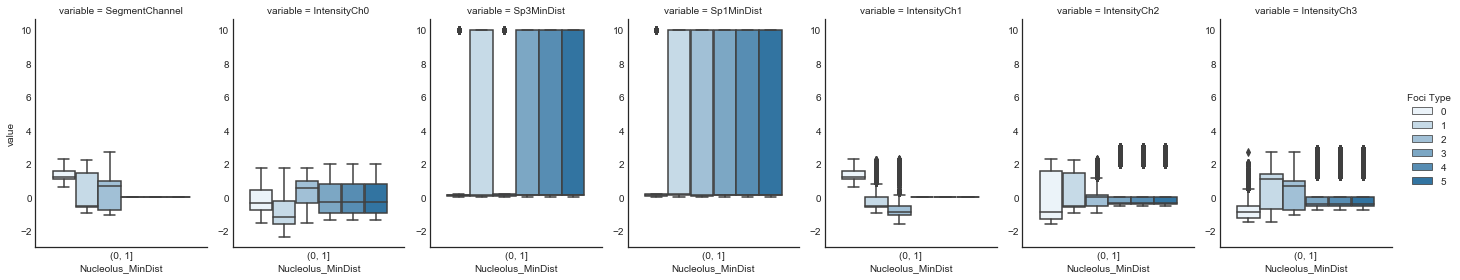

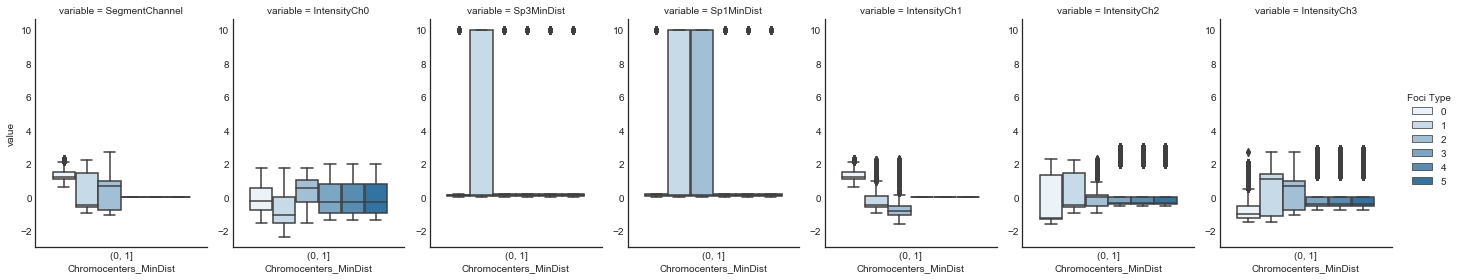

In [63]:
for col in AnalysedFeat:
    g = sns.FacetGrid(df, col="variable", size=4, aspect=.7)
    g.map(sns.boxplot, col, "value", "FociType").add_legend(title="Foci Type")
    g.savefig(col+".png")

### Conclusion
See power point.

### Questions
1. Why are there few sim spots predicted NP?
2. Can we predict segmentedChannel

### Predict SegmentChannel

In [58]:
test= newdf.drop(['IntensityCh1', 'IntensityCh2', 'IntensityCh3'],axis=1)  
test[test["Nucleus_MaxDist"]<10]
SimulatedData = test.loc[newdf["FociType"]>2,]
SegmentedData = test.loc[newdf["FociType"]<3,]
print(SimulatedData.shape)
print(SegmentedData.shape)
del test

(1020000, 48)
(542412, 48)


In [42]:
labels  = test["FociType"].values
TrainSet,TestSet = train_test_split(test,stratify=labels, test_size=0.3, random_state=20012017)
features= TrainSet.drop(['IntensityCh3'],axis=1)    
Lab     = features.columns
features= features.values
labels  = TrainSet["IntensityCh3"].values
print(TrainSet.shape)
print(TestSet.shape)

(1093688, 50)
(468724, 50)


In [43]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

KeyboardInterrupt: 

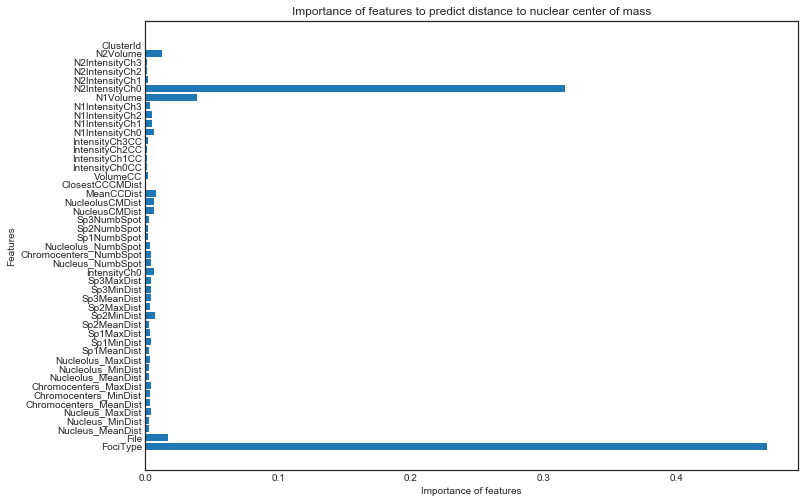

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [26]:
prediction=regr.predict(TestSet[Lab])

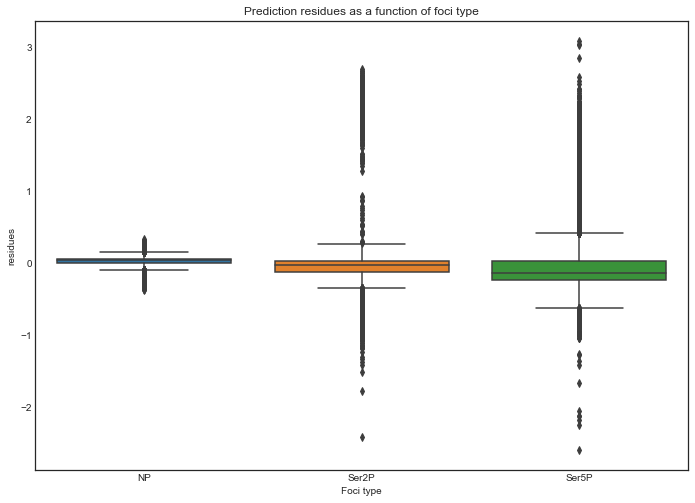

In [27]:
df=pd.DataFrame({"Lab":TestSet["SegmentChannel"], "Pred":prediction})
df["res"] = df["Lab"].subtract(df["Pred"])
df["foci"] = newdf["FociType"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["foci"], df["res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

Text(0.5,0,u'Segmented channel')

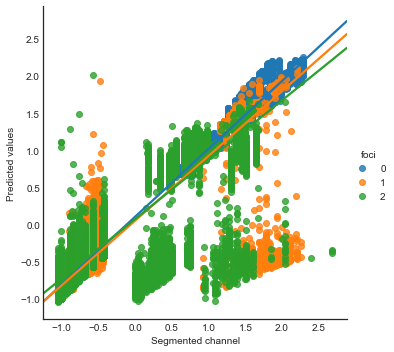

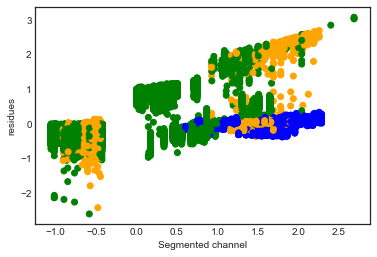

In [36]:
x=["blue", "orange", "green"]
col=[x[y] for y in df["foci"]]
sns.lmplot("Lab","Pred",data=df, hue="foci")
plt.ylabel("Predicted values")
plt.xlabel("Segmented channel")
fig, ax = plt.subplots()
ax.scatter(df["Lab"],df["res"], c=col)
plt.ylabel("residues")
plt.xlabel("Segmented channel")

#sns.lmplot("Res","Lab",data=df, hue="Foci")

In [38]:
#df=df.drop("res", axis=1)
df.groupby(["foci"]).corr()

Lab      Pred
foci                         
0    Lab   1.000000  0.957143
     Pred  0.957143  1.000000
1    Lab   1.000000  0.937949
     Pred  0.937949  1.000000
2    Lab   1.000000  0.895191
     Pred  0.895191  1.000000

## Plot distance to surfaces vs distance between spots

In [36]:
Ylab=["IntensityCh"+str(x) for x in range(1,4)]
#SelFeat = ["SegmentChannel", "IntensityCh0", "Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot"]
#SelFeat=SelFeat+Ylab
SelFeat = ["Sp1MinDist", "Sp2MinDist", "Sp3MinDist"]
SelFeat

['Sp1MinDist', 'Sp2MinDist', 'Sp3MinDist']

In [37]:
AnalysedFeat=["Nucleus_MinDist", "Nucleolus_MinDist", "Chromocenters_MinDist"]

Text(0.5,1,u'Range of analysed features')

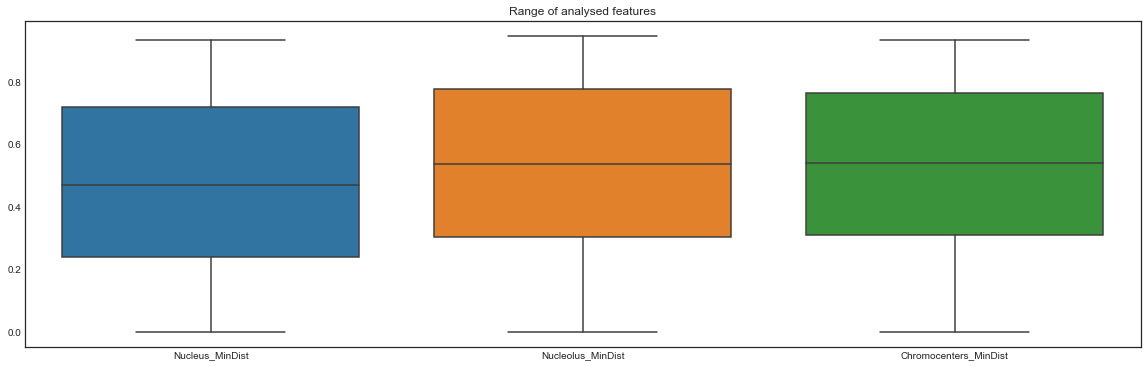

In [222]:
tab=newdf[AnalysedFeat]
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=tab)
plt.title("Range of analysed features")

In [513]:
#Tag distance within threshold and outside of threshold =0.2um
tab=pd.DataFrame(newdf.loc[newdf["ClusterId"]==0, SelFeat+AnalysedFeat+["FociType", "File"]])
tab.loc[tab.Sp1MinDist.isnull()==False, 'Sp1MinDist'] = "WithinThreshold"
tab.loc[tab.Sp1MinDist.isnull()==True, 'Sp1MinDist'] = "OutsideThreshold"
tab.loc[tab.Sp2MinDist.isnull()==False, 'Sp2MinDist'] = "WithinThreshold"
tab.loc[tab.Sp2MinDist.isnull()==True, 'Sp2MinDist'] = "OutsideThreshold"
tab.loc[tab.Sp3MinDist.isnull()==False, 'Sp3MinDist'] = "WithinThreshold"
tab.loc[tab.Sp3MinDist.isnull()==True, 'Sp3MinDist'] = "OutsideThreshold"

In [514]:
breakContinuousD=[x/5.0 for x in range(-10,11)]+[10.0]
factIntiate=0
for col in AnalysedFeat:
    tab[col]= pd.cut( tab[col], breakContinuousD) 
    tab=tab.sort_values(col) 
    tab[col] = pd.factorize(tab[col])[0]+factIntiate
    factIntiate=factIntiate+6
    print(col)

Nucleus_MinDist
Nucleolus_MinDist
Chromocenters_MinDist


In [515]:
tab["surface"]=tab["Nucleus_MinDist"]
tab.loc[tab["surface"]==0, 'surface'] = tab.loc[tab["surface"]==0, 'Nucleolus_MinDist']
tab.loc[tab["surface"]==6, 'surface'] = tab.loc[tab["surface"]==6, 'Chromocenters_MinDist']
tab.loc[tab["surface"]==12, 'surface'] = 19

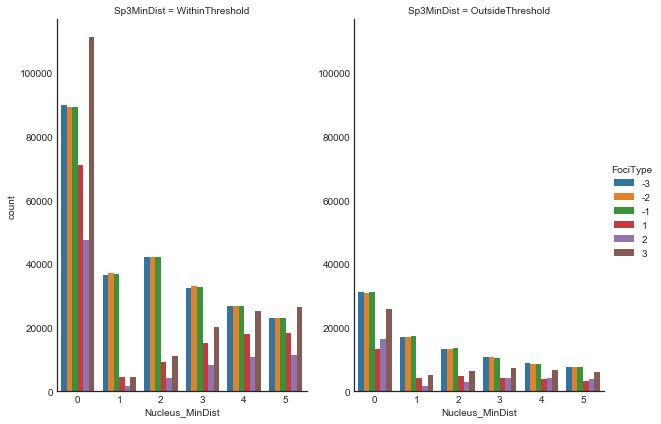

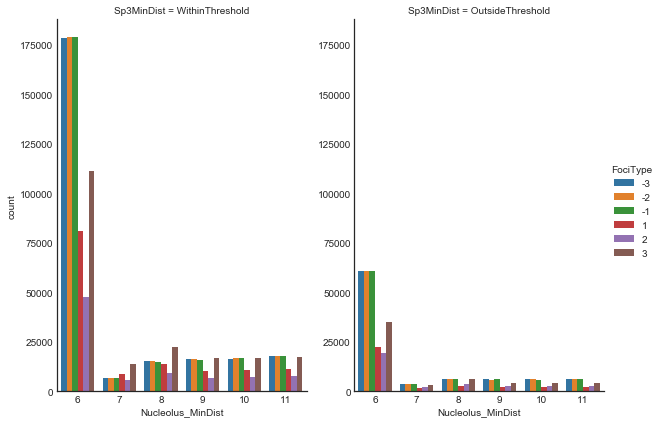

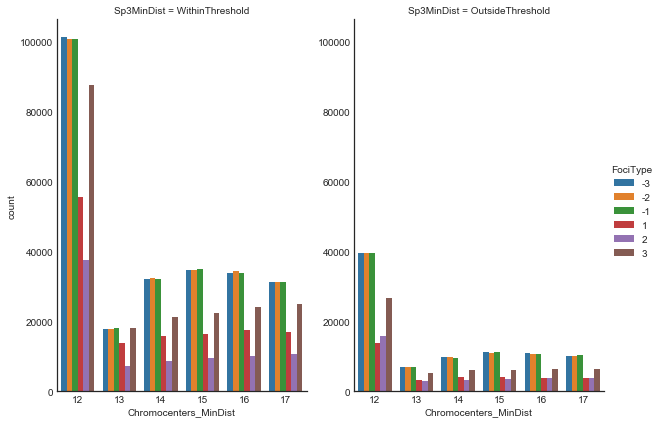

In [274]:
for feat in AnalysedFeat:
    g = sns.factorplot(x=feat, hue="FociType", col="Sp3MinDist",
                   data=tab, kind="count",
                   size=6, aspect=.7);
    g.savefig(feat+"SP3NbrSpots.png")

In [516]:
df= tab.loc[tab["surface"]<19,]
df1=tab.loc[tab["surface"]==19,]

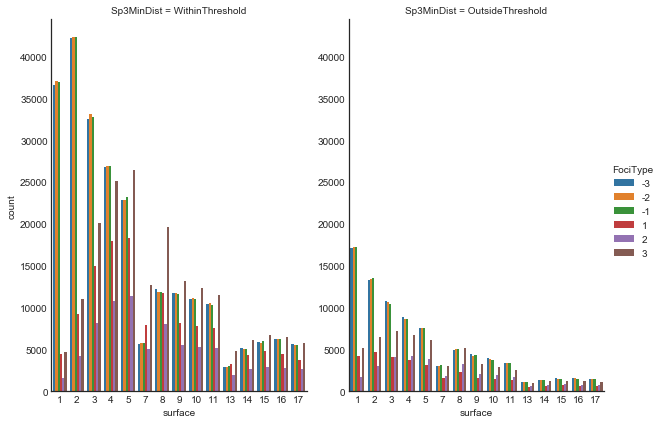

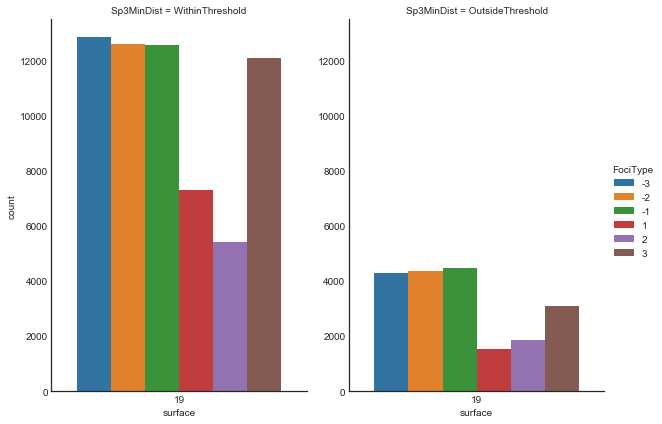

In [287]:
g = sns.factorplot(x="surface", hue="FociType", col="Sp3MinDist",
               data=df, kind="count",
               size=6, aspect=.7)
g.savefig("InsideSurface_"+"SP3NbrSpots.png")
g = sns.factorplot(x="surface", hue="FociType", col="Sp3MinDist",
               data=df1, kind="count",
               size=6, aspect=.7)
g.savefig("OutsideSurface_"+"SP3NbrSpots.png")

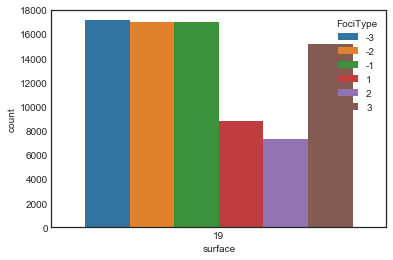

In [293]:
g=sns.countplot(x="surface", hue="FociType", data=df1)
fig=g.get_figure()
fig.savefig("NumberSpotsInBinsLasBin.png")

In [517]:
#get unique rows of tab
labels=["FociType", "File", "surface"]
df=tab[labels]
df=pd.DataFrame(np.unique(df[labels], axis=0))
df.columns=labels

In [518]:
#Get number of spots per bin per image for each spot type
df.set_index(labels, inplace=True)
SelDist=["Sp1MinDist","Sp2MinDist", "Sp3MinDist"]
for feat in SelDist:
    t=tab.loc[tab[feat]=="WithinThreshold",]
    tsize=pd.DataFrame(t.groupby(labels).size())
    df = df.merge(tsize, how='outer', left_index=True, right_index=True)
df.reset_index(inplace=True)
#Get number of simulated spots per bin per image
df.set_index(["File", "surface"], inplace=True)
tsize=pd.DataFrame(tab.groupby(["File", "surface"]).size())/6.0 #because there are 6 spot types
df = df.merge(tsize, how='outer', left_index=True, right_index=True)
df.reset_index(inplace=True)
df.columns=["File", "surface", "FociType"]+SelDist+["AllSpots"]
df.loc[0:5,]

,File,surface,FociType,Sp1MinDist,Sp2MinDist,Sp3MinDist,AllSpots
0,0,1,-3,914.0,934.0,941.0,918.833333
1,0,1,-2,903.0,918.0,933.0,918.833333
2,0,1,-1,845.0,903.0,871.0,918.833333
3,0,1,1,99.0,56.0,136.0,918.833333
4,0,1,2,33.0,30.0,60.0,918.833333
5,0,1,3,169.0,84.0,394.0,918.833333


In [519]:
#normalise number of spots per bin for whithin distance of each foci by the number of simulated spots per bin per image
df[SelDist]=df[SelDist].div(df.AllSpots, axis=0)
df.loc[0:5,]

,File,surface,FociType,Sp1MinDist,Sp2MinDist,Sp3MinDist,AllSpots
0,0,1,-3,0.994740,1.016506,1.024125,918.833333
1,0,1,-2,0.982768,0.999093,1.015418,918.833333
2,0,1,-1,0.919644,0.982768,0.947941,918.833333
3,0,1,1,0.107745,0.060947,0.148014,918.833333
4,0,1,2,0.035915,0.032650,0.065300,918.833333
5,0,1,3,0.183929,0.091420,0.428805,918.833333


In [520]:
#melt SelDist columns to get plots on one go
z = pd.melt(df[labels+SelDist], id_vars=labels)

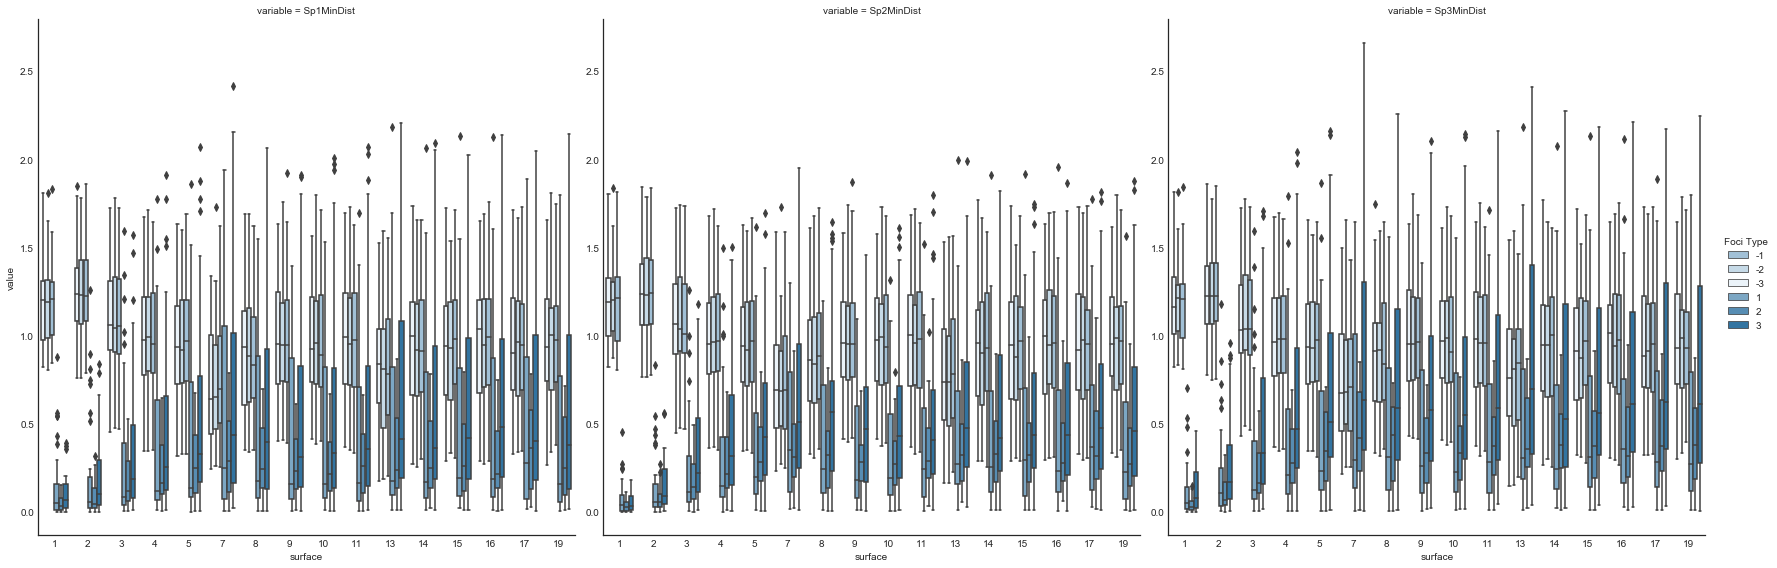

In [488]:
palette = sns.color_palette("husl", 8)
g = sns.FacetGrid(z, col="variable", size=8, aspect=1, palette=palette)
g.map(sns.boxplot, "surface", "value", "FociType").add_legend(title="Foci Type")
#g.set(ylim=(None, 3.7))
g.savefig("NomarlisedBySegNbrSpots.png")

In [521]:
#get unique rows of tab
labels=["FociType", "File", "surface"]
df=tab[labels]
df=pd.DataFrame(np.unique(df[labels], axis=0))
df.columns=labels

In [522]:
#Get number of spots per bin per image for each spot type
df.set_index(labels, inplace=True)
tsize=pd.DataFrame(tab.groupby(labels).size())
df = df.merge(tsize, how='outer', left_index=True, right_index=True)
df.reset_index(inplace=True)
#Get number of simulated spots per bin per image
df.set_index(["File", "surface"], inplace=True)
tsize=pd.DataFrame(tab.groupby(["File", "surface"]).size())/6.0 #because there are 6 spot types
df = df.merge(tsize, how='outer', left_index=True, right_index=True)
df.reset_index(inplace=True)
df.columns=["File", "surface", "FociType"]+["NbrSpotPerFoci","AllSpots"]
df.loc[0:5,]

,File,surface,FociType,NbrSpotPerFoci,AllSpots
0,0,1,-3,1491,918.833333
1,0,1,-2,1487,918.833333
2,0,1,-1,1417,918.833333
3,0,1,1,263,918.833333
4,0,1,2,121,918.833333
5,0,1,3,734,918.833333


In [523]:
#normalise number of spots per bin for whithin distance of each foci by the number of simulated spots per bin per image
df["NbrSpotPerFoci"]=df["NbrSpotPerFoci"].div(df.AllSpots, axis=0)
df.loc[0:5,]

,File,surface,FociType,NbrSpotPerFoci,AllSpots
0,0,1,-3,1.622710,918.833333
1,0,1,-2,1.618357,918.833333
2,0,1,-1,1.542173,918.833333
3,0,1,1,0.286233,918.833333
4,0,1,2,0.131689,918.833333
5,0,1,3,0.798839,918.833333


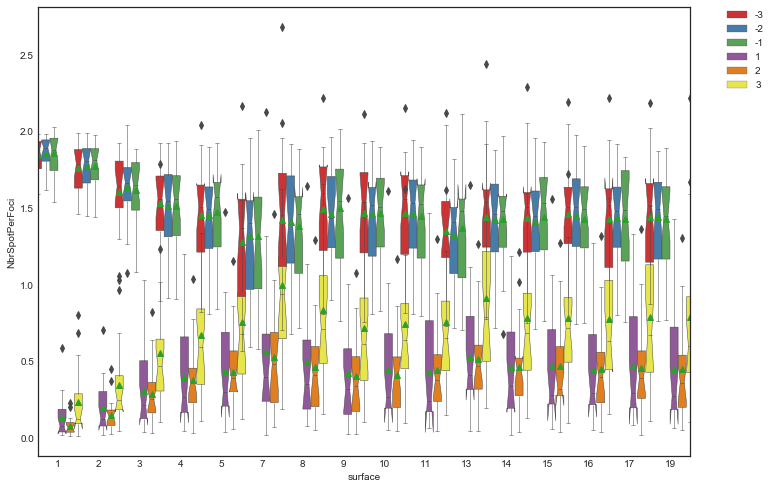

In [528]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
g=sns.boxplot(x="surface", y="NbrSpotPerFoci", data=df, hue="FociType", palette="Set1", 
              width=1.2, linewidth=0.5, notch=True, showmeans=True)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#g.set(ylim=(None, 3.7))
fig.savefig("DiploidNomarlisedTotalNbrSpots.png")

In [66]:
breakContinuousD=[x/5.0 for x in range(-10,11)]+[10.0]
for col in AnalysedFeat:
    tab[col]= pd.cut( newdf[col], breakContinuousD) 
df = pd.melt(tab, id_vars=['FociType']+AnalysedFeat)

TypeError: float() argument must be a string or a number

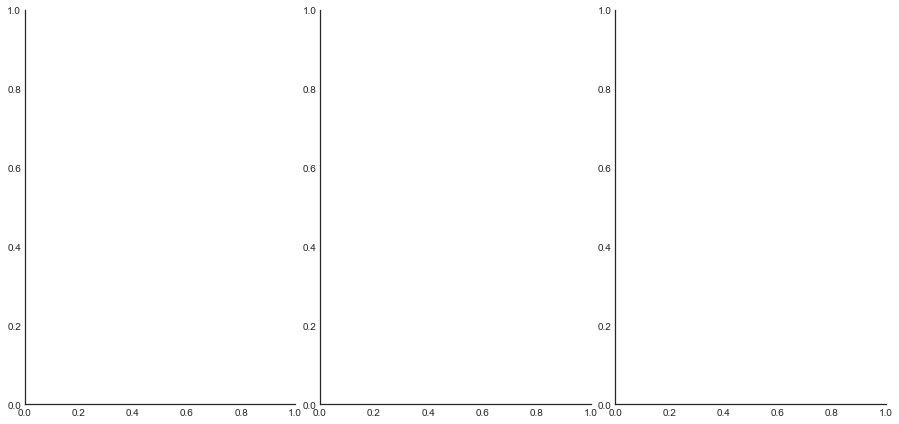

In [67]:
for col in AnalysedFeat:
    df.sort_values(['FociType', col], ascending=[True, True])
    g = sns.FacetGrid(df, col="variable", size=6, aspect=.7)
    g.map(sns.boxplot, col, "value", "FociType").add_legend(title="Foci Type")
    #g.set(ylim=(9.99, None))
    g.savefig(col+"NbrSpots.png")

## Predict distance to surfaces: nuclear periphery, nucleolus and chromocenters

C:\Users\Pheonix\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NucIntervals,"(-3.0, -1.25]","(-1.25, 0.0]","(0.0, 3.0]","(3.0, 10.0]"
0,8.383142,16.187484,25.570531,49.858844
1,5.060416,14.370864,25.957901,54.610819
2,6.289284,14.881383,25.287217,53.542117
3,6.746765,27.965588,29.901471,35.386176
4,6.691765,28.044412,29.892941,35.370882
5,6.657941,27.815882,29.878529,35.647647


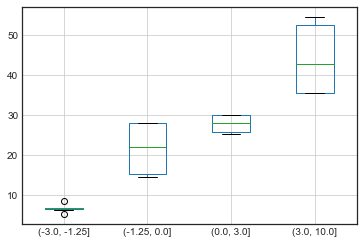

In [206]:
SegmentedData = newdf[["FociType", "Nucleus_MinDist"]]
SegmentedData["NucIntervals"]= pd.cut( SegmentedData['Nucleus_MinDist'], [-3,-1.25,0,3,10])
tab = SegmentedData.groupby(['FociType', 'NucIntervals']).size()
tab=tab.unstack()
name=pd.DataFrame(tab).columns
tab=np.array(tab, dtype=float)
tab=np.divide(tab, tab1)*100
tab=pd.DataFrame(tab)
tab.columns=name
tab.boxplot()
tab

... Create DistanceToSurface columns : contains distance to closest surface, or 10 if no close surface in a 0.2 um radius

In [22]:
newdf["DistanceToSurface"]=newdf["Nucleus_MinDist"]
newdf.loc[newdf["Nucleolus_MinDist"]<9,"DistanceToSurface"] =newdf.loc[newdf["Nucleolus_MinDist"]<9,'Nucleolus_MinDist']
newdf.loc[newdf["Chromocenters_MinDist"]<9,"DistanceToSurface"] =newdf.loc[newdf["Chromocenters_MinDist"]<9,'Chromocenters_MinDist']
newdf.iloc[0:5,]

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId,DistanceToSurface
0,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.141626,0.141626,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-0.065766
1,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-1.575173
2,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.012142,0.012142,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-1.908466
3,0,0,0.180854,0.180854,0.180854,10.0,10.0,10.0,0.017757,0.017757,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,1.359124
4,0,0,0.147949,0.147949,0.147949,10.0,10.0,10.0,0.094566,0.006933,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-1.773476


...
- Select DistanceToSurface <10, those within 0.2 um radius of a surface
- Take out all the other distance to surface columns
- Prepare train set and data set

In [146]:
newdf.shape

(1562412, 51)

In [150]:
SegmentedData = newdf.loc[newdf["Nucleus_MinDist"]<10,]
SegmentedData

,IntensityCh0,IntensityCh1,IntensityCh2,IntensityCh3,SegmentChannel,Nucleus_NumbSpot,Chromocenters_NumbSpot,Nucleolus_NumbSpot,Sp1NumbSpot,Sp2NumbSpot,...,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,Sp3MaxDist,FociType,File,ClusterId


In [145]:
SegmentedData = newdf.loc[newdf["Nucleus_MinDist"]<10,]
SelectFeatures=["IntensityCh0", "IntensityCh1", "IntensityCh2", "IntensityCh3", 
                "Sp1MinDist", "Sp2MinDist", "Sp3MinDist", 
               "Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot", 
               "N1Volume", "N2Volume", "VolumeCC", "Nucleus_MinDist", "FociType", "ClusterId"]
SegmentedData = SegmentedData[SelectFeatures]
SimulatedData = SegmentedData.loc[newdf["FociType"]>2,]
SegmentedData = SegmentedData.loc[newdf["FociType"]<3,]
print(SimulatedData.shape)
print(SegmentedData.shape)

(0, 16)
(0, 16)


In [134]:
labels  = SegmentedData["FociType"].values
TrainSet,TestSet = train_test_split(SegmentedData,stratify=labels, test_size=0.3, random_state=20012017)
features= TrainSet.drop(['Nucleus_MinDist'],axis=1)    
Lab     = features.columns
features= features.values
labels  = TrainSet["Nucleus_MinDist"].values
print(TrainSet.shape)
print(TestSet.shape)

(179884, 16)
(77094, 16)


In [135]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

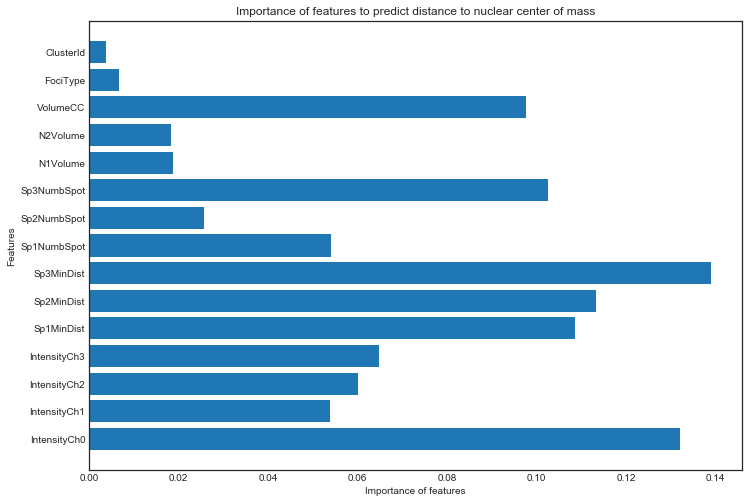

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [137]:
prediction=regr.predict(TestSet[Lab])

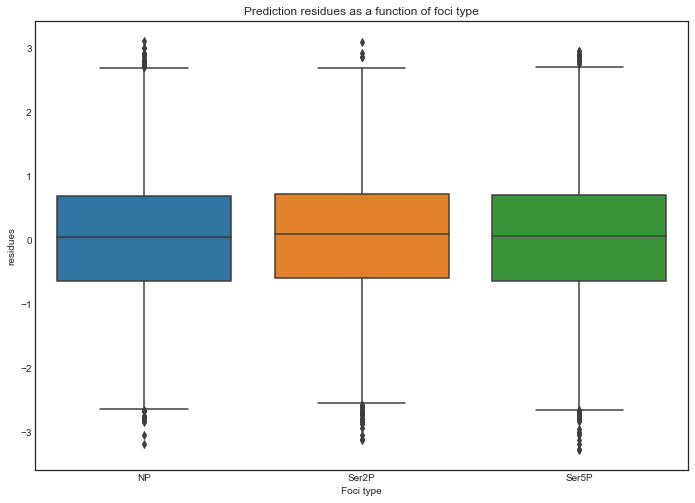

In [138]:
df=pd.DataFrame({"Lab":TestSet["Nucleus_MinDist"], "Pred":prediction})
df["res"] = df["Lab"].subtract(df["Pred"])
df["foci"] = newdf["FociType"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["foci"], df["res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

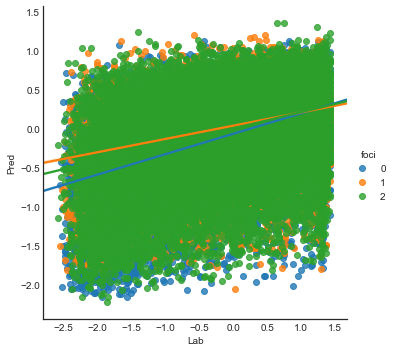

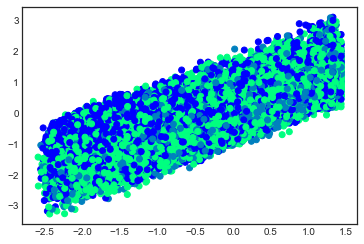

In [139]:

sns.lmplot("Lab","Pred",data=df, hue="foci")
fig, ax = plt.subplots()
ax.scatter(df["Lab"],df["res"], c=df["foci"], cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

In [140]:
df.groupby(["foci"])[["Lab", "Pred"]].corr()

Lab      Pred
foci                         
0    Lab   1.000000  0.474756
     Pred  0.474756  1.000000
1    Lab   1.000000  0.346867
     Pred  0.346867  1.000000
2    Lab   1.000000  0.398384
     Pred  0.398384  1.000000

#### Conclusion 
- There is a a relationship between center of mass of the nucleus, the nucleolus and and the center of mass of all chromocenters, since I am able to predict quite well for simulated spots as well - do the same thing with just these three variables using FISH images as well
- There doesn't seem to be a relationship between RNA Polii distance to surfaces and other features - check MachineLearningRNADistributionNote.ppt

In [31]:
ControlNegative=newdf[newdf["FociType"]==0]
SegData=newdf[newdf["FociType"]>0]
labels=SegData["FociType"]
TrainSet,TestSet = train_test_split(SegData,stratify=labels, test_size=0.3, random_state=20012017)

#### Can we predict distance to periphery = proxy center of mass

In [53]:
labels  = TrainSet["Nucleus"].values
features= TrainSet.drop(['Nucleus','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [54]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

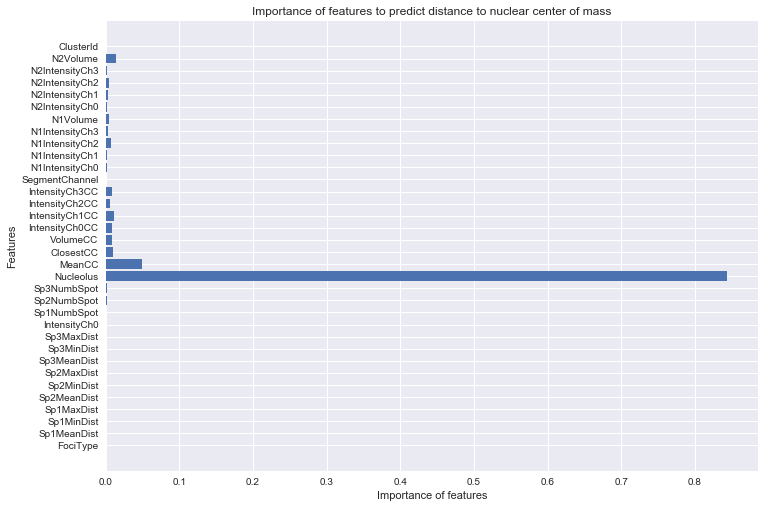

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [56]:
predictionTest=regr.predict(TestSet[Lab])
predictionNeg=regr.predict(ControlNegative[Lab])

In [57]:
print("Accuracy score for segmented spots:")
print(regr.score(TestSet[Lab], TestSet["Nucleus"]))
print("Accuracy score for simulated spots:")
print(regr.score(ControlNegative[Lab], ControlNegative["Nucleus"]))

Accuracy score for segmented spots:
0.992547487382
Accuracy score for simulated spots:
0.957018833958


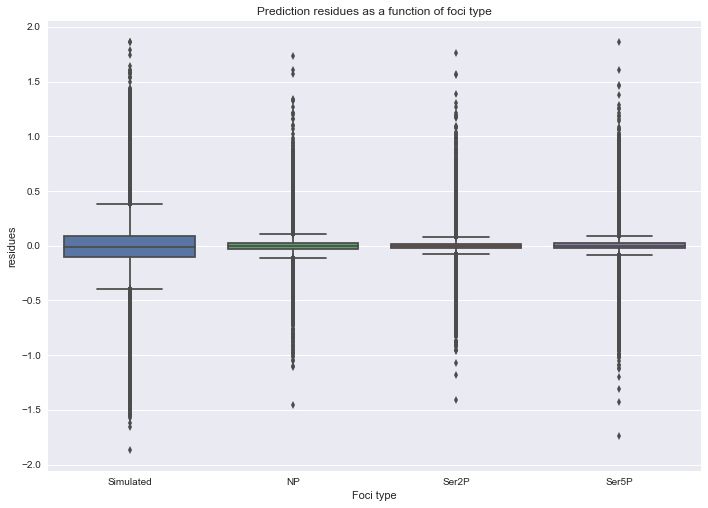

In [40]:
Pred=np.concatenate((np.array(predictionTest), np.array(predictionNeg)))
Obs=np.concatenate((np.array(TestSet["Nucleus"]), np.array(ControlNegative["Nucleus"])))
Foci=np.concatenate((np.array(TestSet["FociType"]), np.array(ControlNegative["FociType"])))
Res=Obs-Pred
df=pd.DataFrame({"Lab":Obs, "Pred":Pred, "Res":Res, "Foci": Foci})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["Foci"], df["Res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["Simulated","NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

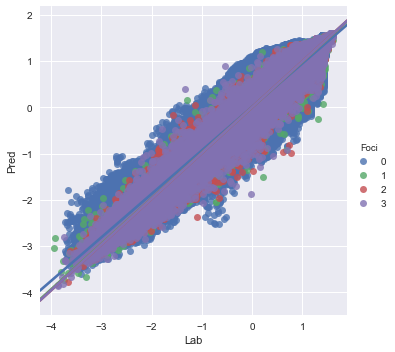

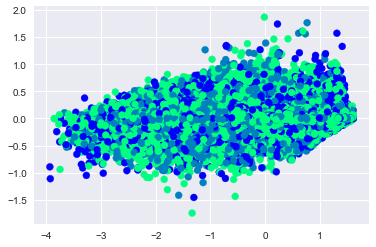

In [42]:
sns.lmplot("Lab","Pred",data=df, hue="Foci")
fig, ax = plt.subplots()
Res=np.array(TestSet["Nucleus"])-np.array(predictionTest)
ax.scatter(np.array(TestSet["Nucleus"]),Res, c=np.array(TestSet["FociType"]), cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

# Conclusion
